This notebook demonstrates the resampling algorithm used to reproject ESA EE SMOS Level-2 products.

In [1]:
import glob
import os.path

import numpy as np
import xarray as xr

from xcube_smos.dgg import SmosDiscreteGlobalGrid
from xcube_smos.l2cube import SmosMappedL2Cube

from xcube.core.gridmapping import GridMapping

The SMOS discrete global grid. Installed by SNAP SMOS-Box in "~/.snap/auxdata":

In [2]:
dgg_path = os.path.expanduser("~/.snap/auxdata/smos-dgg/grid-tiles")

Path for a random SMOS Level-2 NetCDF product which serves as an example. It respresents a single time step in a future SMOS Level-2C data cube:

In [3]:
l2_product_path_wc = "../testdata/SM/*.nc"

---

### The SMOS Discrete Global Grid

In [4]:
dgg = SmosDiscreteGlobalGrid(dgg_path)

In [5]:
dgg.num_levels

5

---

### A SMOS L2C Cube

We open here a set of Level-2 NetCDF products to form the cube. 

It is opened for the provided discrete global grid `dgg` that applies to all Level-2 NetCDF products.

In [6]:
l2_product_paths = sorted(glob.glob(l2_product_path_wc))
l2_product_paths

['../testdata/SM\\SM_OPER_MIR_SMUDP2_20230401T150613_20230401T155931_700_001_1.nc',
 '../testdata/SM\\SM_OPER_MIR_SMUDP2_20230401T155619_20230401T164933_700_001_1.nc',
 '../testdata/SM\\SM_OPER_MIR_SMUDP2_20230401T173625_20230401T182938_700_001_1.nc',
 '../testdata/SM\\SM_OPER_MIR_SMUDP2_20230401T191629_20230401T200942_700_001_1.nc',
 '../testdata/SM\\SM_OPER_MIR_SMUDP2_20230401T205632_20230401T214947_700_001_1.nc']

In [7]:
cube = SmosMappedL2Cube.open(l2_product_paths, dgg)

c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  self.time_bnds = xr.DataArray(
c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:71: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by 

Because the `dgg` is a multi-resolution pyramid comprising 5 levels, the L2C cube is too:

In [8]:
cube.num_levels

5

This is the original SMOS Level-2 product with the 1-D variables:

In [9]:
l2_ds_0 = cube.get_dataset(0)
l2_ds_0

<xarray.Dataset>
Dimensions:            (lat: 8064, lon: 16384, time: 5, bnds: 2)
Coordinates:
  * lat                (lat) float64 88.58 88.56 88.54 ... -88.54 -88.56 -88.58
  * lon                (lon) float64 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0
  * time               (time) datetime64[ns] 2023-04-01T15:32:52 ... 2023-04-...
    time_bnds          (time, bnds) datetime64[ns] 2023-04-01T15:06:13 ... 20...
Dimensions without coordinates: bnds
Data variables:
    N_RFI_Y            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    N_RFI_X            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Soil_Moisture_DQX  (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Chi_2              (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    RFI_Prob           (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Chi_2_P            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Soil_Moisture      (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
Attributes: (12/385)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                         ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

In [10]:
l2_ds_2 = cube.get_dataset(2)
l2_ds_2

<xarray.Dataset>
Dimensions:            (lat: 2016, lon: 4096, time: 5, bnds: 2)
Coordinates:
  * lat                (lat) float64 88.55 88.46 88.37 ... -88.37 -88.46 -88.55
  * lon                (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * time               (time) datetime64[ns] 2023-04-01T15:32:52 ... 2023-04-...
    time_bnds          (time, bnds) datetime64[ns] 2023-04-01T15:06:13 ... 20...
Dimensions without coordinates: bnds
Data variables:
    N_RFI_Y            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    N_RFI_X            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Soil_Moisture_DQX  (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Chi_2              (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    RFI_Prob           (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Chi_2_P            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Soil_Moisture      (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
Attributes: (12/385)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                         ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

In [11]:
sm = l2_ds_2.Soil_Moisture
sm

<xarray.DataArray 'Soil_Moisture' (time: 5, lat: 2016, lon: 4096)>
dask.array<where, shape=(5, 2016, 4096), dtype=float32, chunksize=(1, 504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.55 88.46 88.37 88.29 ... -88.37 -88.46 -88.55
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * time     (time) datetime64[ns] 2023-04-01T15:32:52 ... 2023-04-01T21:23:09
Attributes:
    units:       m3 m-3
    _FillValue:  -999.0

Because the underlying Level-2 product has been opened using `decode_cf=False`, the value -999 _is not_ turned into NaN:

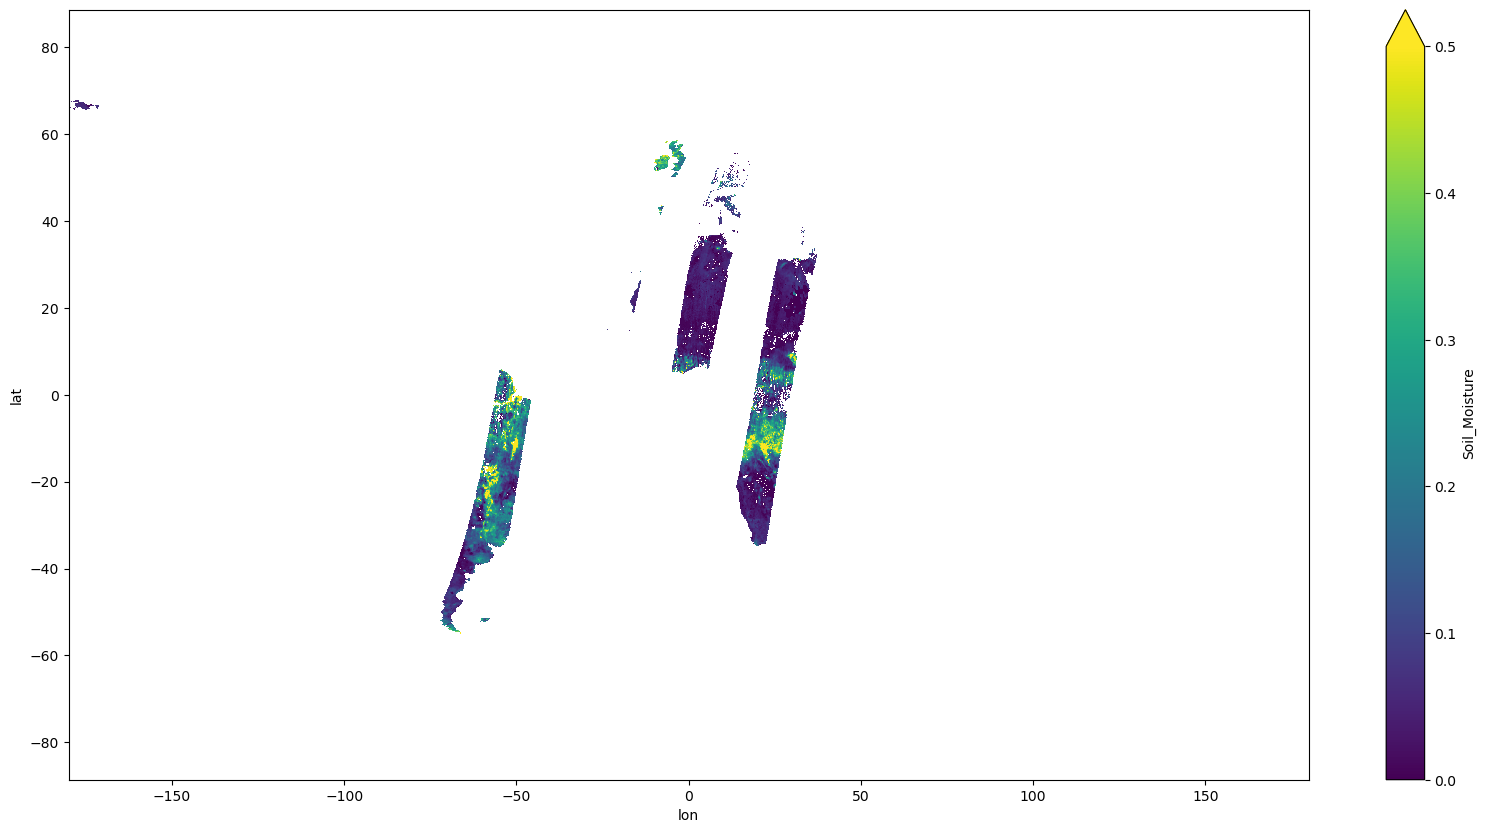

In [13]:
sm.where(sm != -999, np.nan).mean(dim="time").plot.imshow(figsize=(20, 10), vmin=0, vmax=0.5)